![Astrofisica Computacional](../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---
# Ejercicios 02. Métodos Numéricos Básicos II

## B. El Punto de Lagrange $L_1$

El punto de Lagrange $L_1$ del sistema Tierra-Luna es aquel lugar en el que la atracción gravitacional de estos dos cuerpos actuando sobre una partícula de prueba se combina de tal manera que se logra un equilibrio con la fuerca centrípeta que mantiene la partícula en su orbita. 

---

1. Asuma que las orbitas son circulares y que la masa de la Tierra es mucho mayor que la de la Luna (y que la de la partícula de prueba) para mostrar que la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface la ecuación
    \begin{equation}
        \frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
    \end{equation}
    donde $R$ es la distance entre la Tierra y la Luna, $M$ y $m$ son las masas de la Tierra y de la Luna, respectivamente,  y $\omega$ es la velocidad angular de la Luna y la partícula alrededor de la Tierra.

**Solución.**

La fuerza total que siente la partícula de prueba se puede escribir como

\begin{equation}
\textbf{F} = \textbf{F}_T + \textbf{F}_L = - \mu \omega^2 \textbf{r},
\end{equation}

donde $\textbf{F}_T$ es la fuerza gravitacional que ejerce la Tierra, $\textbf{F}_L$ es la fuerza gravitacional que ejerce la Luna, $\mu$ es la masa de la partícula de prueba y $\omega$ es la velocidad angular de la partícula de prueba en su orbita alrededor de la Tierra en una circunferencia de radio $r$. Reemplazando las fuerzas gravitacionales se tiene 

\begin{equation}
-\frac{GM\mu}{r^2} + \frac{Gm\mu}{(R-r)^2} = -\mu \omega^2 r
\end{equation}

\begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} =  \omega^2 r.
\end{equation}

---
2. Claramente esta ecuación es un polinomio de orden 5 en $r$ y por ello su solución debe encontrarse en forma numérica. Escriba un programa que utilice el método de la secante (o Newton-Raphson) para resolver esta ecuación y encontrar la ubicación del punto $L_1$. Para ello considere los siguientes parámetros:

- $G = 6.674 \times 10^{-11} \text{ m}^3 \text{ kg}^{-1} \text{ s}^{-2}$
- $M = 5.974 \times 10^{24} \text{ kg}$
- $m = 7.348 \times 10^{22} \text{ kg}$
- $R = 3.844 \times 10^{8} \text{ m}$
- $\omega = 2.662 \times 10^{-6} \text{ s}^{-1}$


---
**Solución.**

Debido a los valores de las constantes involucradas dentro de la fuerza, re-escalaremos la expresión en la siguiente forma:

\begin{align}
GM(R-r)^2 - Gmr^2 = &\omega^2 r^3(R-r)^2 \\
GMR^2\left( 1-\frac{r}{R}\right)^2 - Gmr^2 = &\omega^2 r^3R^2\left( 1-\frac{r}{R}\right)^2 \\
GM\left( 1-\frac{r}{R}\right)^2 - Gm\left( \frac{r}{R}\right)^2 = &\omega^2 r^3\left( 1-\frac{r}{R}\right)^2 \\
GM\left( 1-\frac{r}{R}\right)^2 - Gm\left( \frac{r}{R}\right)^2 = &\omega^2 R^3 \left(\frac{r}{R}\right)^3\left( 1-\frac{r}{R}\right)^2.
\end{align}

De esta forma definimos la variable $x = \frac{r}{R}$ para tener
\begin{align}
GM\left( 1 - x \right)^2 - Gmx^2 = &\omega^2 R^3 x^3 \left( 1-x\right)^2 \\
\left( 1 - x \right)^2 - \frac{m}{M} x^2 = &\frac{\omega^2 R^3}{GM} x^3 \left( 1-x\right)^2
\end{align}

De esta forma, consideraremos la siguiente función a la que se le debe encontrar la raiz,


\begin{equation}
f(x) = (1-x)^2 - \frac{m}{M} x^2 - \frac{\omega^2 R^3}{GM} x^3 \left( 1-x\right)^2.
\end{equation}

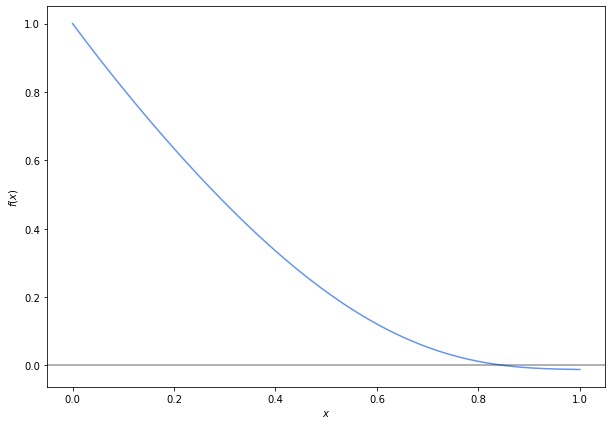

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
omega = 2.662e-6

def f(x):
    C = (omega**2)*(R**3)/(G*M)
    return (1-x)**2 - (m/M)*x**2 - C*(x**3)*((1-x)**2)




x_range = np.linspace(0,1,1000)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x_range,f(x_range), color='cornflowerblue')
ax.axhline(0, color='black', alpha=0.4)

#ax.set_ylim(0, 2.5e5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
plt.show()

In [2]:
def secMethod(f,root0,root,epsilon=1e-10):
    '''
    Secant Method for finding a root
    --------------------------------------------
    Arguments:
    f: Function 
    root0,root: Initial points to begin the search 
                of the root
    epsilon: Tolerance for the root
    --------------------------------------------
    Dependeces: NumPy
    --------------------------------------------
    '''
    while np.abs(f(root))>epsilon:
        new_root = root - f(root)*(root - root0)/(f(root) - f(root0))
        root0, root = root, new_root
    return root

root = secMethod(f, 0.5, 0.55)
print(f'La ubicación del punto de Lagrange es\n\n r = {root*R:.5e} m. = {root:.8f} R\n')
print(f'para la cual la función tiene un valor de\n\n f(r) =  {f(root):.8e}')

La ubicación del punto de Lagrange es

 r = 3.26045e+08 m. = 0.84819217 R

para la cual la función tiene un valor de

 f(r) =  5.57894182e-12


Aqui se puede ver la grafica con la localización de la raíz utilizando todas las constantes y la forma original de la ecuación.

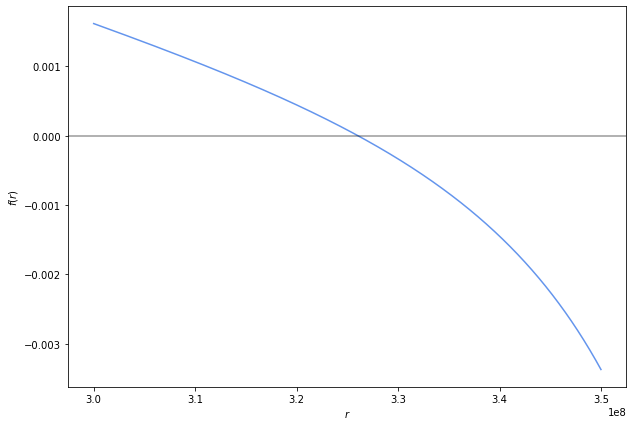

In [11]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
omega = 2.662e-6

def f(r):
    return G*M/r**2 - G*m/(R-r)**2 - omega**2*r




x_range = np.linspace(3e8,3.5e8,1000)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x_range,f(x_range), color='cornflowerblue')
ax.axhline(0, color='black', alpha=0.4)
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$f(r)$')
plt.show()